In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# CSV-Datei einlesen
df = pd.read_csv('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/incidents.csv', sep='\t', low_memory=False)  # Oder ohne delimiter

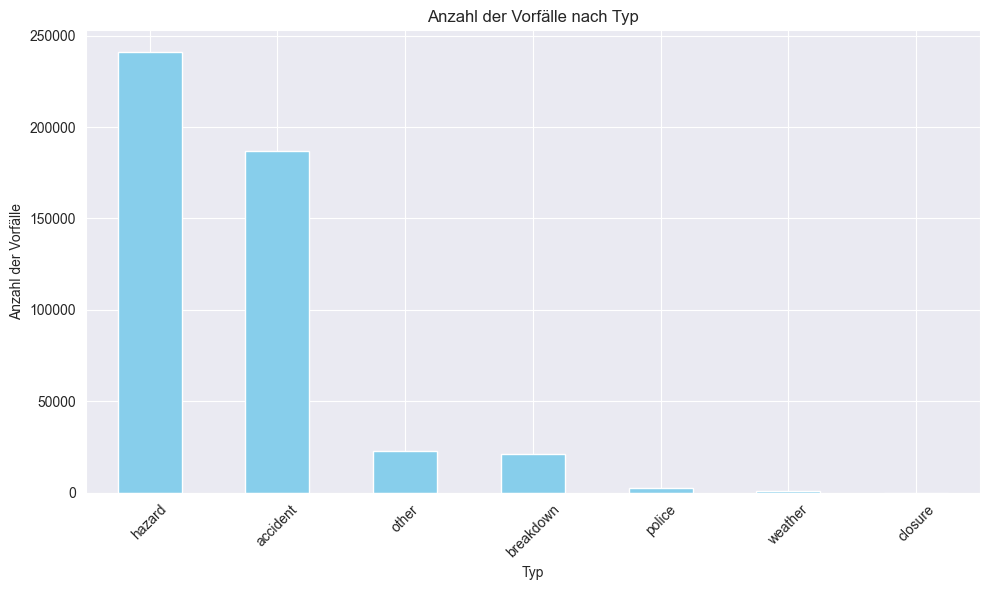

In [7]:
# Anzahl der Zeilen für jeden einzigartigen Wert in der Spalte "type" ermitteln
type_counts = df['type'].value_counts()

# Schwellenwert für die kleinen Werte festlegen
threshold = 5  # Beispielsweise Werte unter 5

# Kleine Werte zusammenfassen
type_counts_reduced = type_counts[type_counts >= threshold]

# Zusammenfassen der kleinen Werte in "Other"
other_count = type_counts[type_counts < threshold].sum()
type_counts_reduced = pd.concat([type_counts_reduced, pd.Series({'Other': other_count})])

# Säulendiagramm erstellen
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')  # Bar-Chart erstellen und Farbe anpassen
plt.title('Anzahl der Vorfälle nach Typ')
plt.xlabel('Typ')
plt.ylabel('Anzahl der Vorfälle')
plt.xticks(rotation=45)  # Dreht die x-Achsen-Beschriftungen um 45 Grad, um sie besser lesbar zu machen
plt.tight_layout()  # Layout-Optimierung für bessere Lesbarkeit
plt.savefig('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/Bilder/AnzahlVorfaelle.svg')
plt.show()

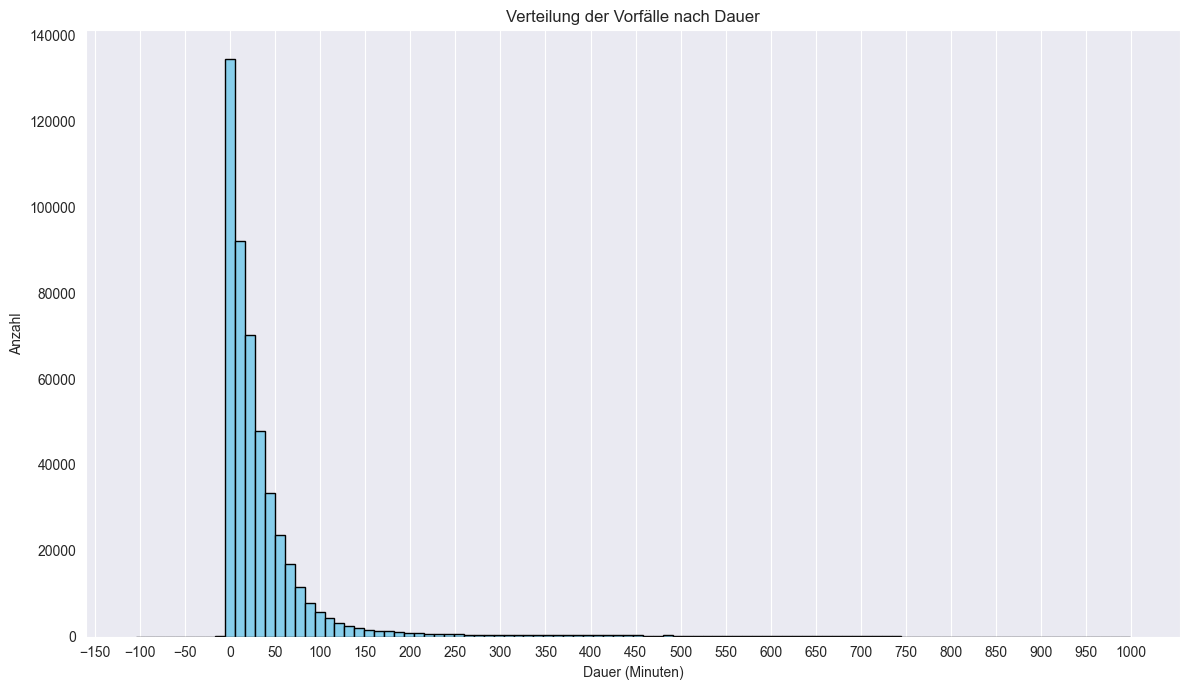

In [11]:
# Assume df is already loaded with 'Duration (mins)' column
plt.figure(figsize=(12, 7))

# Determine the min and max values for bins to capture any negative values
min_duration = df['Duration (mins)'].min()
max_duration = df['Duration (mins)'].max()

# Histogramm mit 100 Bins, um auch negative Werte darzustellen
plt.hist(df['Duration (mins)'], bins=100, color='skyblue', edgecolor='black')

# Setze die Titel und Achsenbeschriftungen
plt.title('Verteilung der Vorfälle nach Dauer')
plt.xlabel('Dauer (Minuten)')  
plt.ylabel('Anzahl')

# Passe die xticks an, um nur Vielfache von 50 anzuzeigen (inklusive negative Werte)
min_xtick = (df['Duration (mins)'].min() // 50) * 50  # nächstes Vielfaches von 50 nach unten
plt.xticks(range(min_xtick, df['Duration (mins)'].max() + 50, 50))

# Gitterlinien für die y-Achse
plt.grid(axis='y')

# Anzeige optimieren und speichern
plt.tight_layout()
plt.savefig('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/Bilder/VerteilungVorfaelle.svg')
plt.show()